## 1st Point

Hash functions and bloom filter

In [1]:
import numpy as np
from tqdm import tqdm
import scipy.stats
import time
from bitarray import bitarray
import math

In this part we upload the txt files

In [2]:
pas1 = []
with open('C:\\Users\\Giorgio\\Desktop\\data\\passwords1.txt','r') as inputfile:
    for line in inputfile:
        pas1.append(line)
print(len(pas1))

100000000


In [3]:
pas2 = []
with open('C:\\Users\\Giorgio\\Desktop\\data\\passwords2.txt','r') as inputfile:
    for line in inputfile:
        pas2.append(line)
print(len(pas2))

39000000


Now we are going to calculate parameters of bloom filter as suggested by the website we set a probability of false positive equal to 5% it is not the smallest probability that we could choose, but a smaller probability implies a larger number of hash functions and it means a much slower code

In [4]:
p = 0.05
n = len(pas1)
m = -(n * math.log(p))/(math.log(2)**2)
k = (m/n) * math.log(2) #number of hashes function that bloom filter needs
k=int(k)
print(k)

4


With a probability equal to 5% we need k=4 hash functions

In [5]:
#code for hash functions
def first_version(parameter, lenght):
    return parameter % len(lenght)

def second_version(parameter, lenght):
    return parameter % math.floor(math.sqrt(len(lenght)))



def hash_functions(lenght, string):
    sum_str = str(ord(string[0])*(1))
    for i in range(1, len(string)):
        sum_str += str(ord(string[i])*(i+1))
    sum_hash = int(sum_str)

    h1 = first_version(sum_hash//2, lenght)
    h2 = first_version(sum_hash, lenght)
    h3 = first_version(sum_hash**2, lenght)
    h4 = second_version(sum_hash//2, lenght)
    return h1, h2, h3, h4

We define a function for bloom filter

In [6]:
def BF_Function(file1, file2):
    start = time.time()
    bloom_tables = bitarray(int(m))
    bloom_tables.setall(0)
    for pw in file1:
        h_list = list(hash_functions(bloom_tables, pw))
        for i in h_list:
            if  bloom_tables[i] == 0:
                bloom_tables[i] = 1
    duplicates_counter = 0
    for pw in file2:
        h_list = list(hash_functions(bloom_tables, pw))
        count = 0
        for i in h_list:
            if bloom_tables[i] != 0:
                count += 1
        if count == k:
            duplicates_counter += 1
    end = time.time()

    print('Duplicates Found: ', duplicates_counter)
    print('Execution time: ', end - start)
    print('This means that with a probability of false positive of 5% we have found ',duplicates_counter,' duplicates ')

Here we use the Bloom_Filter sunction with our data 

In [7]:
BF_Function(pas1, pas2)

Duplicates Found:  20859574
Execution time:  2292.2361690998077
This means that with a probability of false positive of 5% we have found  20859574  duplicates 


## 2nd Point

In this section there are 3 different functions. The first is a simple Counting Sort that I wrote thanks my background of Computer Science. The other 2 methods are based on the first simple counting sorl. The complexity of both is O (n), moreover I imported the time function, in this way is possible to know how many time need the method to order the list.

In [1]:
def myCountingSort(list):
    t1 = [0 for _ in range(max(list))]
    t2 = [0 for _ in range(max(list)+1)]
    orderLst = [[] for _ in list]
    for i in list:
        t2[i] += 1
    for i in range(max(list)+1):
        t2[i] += t2[i-1]
    for i in range(len(list)):
        t1[t2[list[i]]-1] = list[i]
        t2[list[i]] -= 1
    for i in range(len(list)):
        orderLst[i] = t1[i]
    orderLst.remove(orderLst[0]) #because in automatically the first element will be 0.
    print(orderLst)

In [2]:
o=[3254536,432532576,876543,23346578,2137,234326,7654321,45346]
myCountingSort(o)

[2137, 45346, 234326, 876543, 3254536, 7654321, 23346578]


#### Libraries
We use the time library because in this way is possible to see what is the real time that the function need to solve the sort with some different input

In [5]:
import time

In [16]:
def myAlphabetSort(list):
    start=time.time()
    t1 = [0 for _ in range(256)]
    t2 = [0 for _ in range(256)]
    orderLst = [[] for _ in list]
    for i in list:
        t2[ord(i)] += 1
    for i in range(256):
        t2[i] += t2[i-1]
    for i in range(len(list)):
        t1[t2[ord(list[i])]-1] = list[i]
        t2[ord(list[i])] -= 1
    for i in range(len(list)):
        orderLst[i] = t1[i]
    end = time.time()
    print(orderLst)
    print('With this input the method need of: '+str(end-start)+' sec')

In [18]:
o=['q','w','e','r','t','y','u','i','o','p','a','s','d','f','g','h','j','k','l','z','x','c','v','b','n','m']
myAlphabetSort(o)

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
With this input the method need of: 0.003473043441772461 sec


In [6]:
def myWordSort(list):
    start=time.time()
    t1 = [0 for _ in range(256)]
    t2 = [0 for _ in range(256)]
    t3 = [ch[0] for ch in list]
    orderLst = [[] for _ in list]
    for i in t3:
        t2[ord(i)] += 1
    for i in range(256):
        t2[i] += t2[i-1]
    for i in range(len(list)):
        t1[t2[ord(t3[i])]-1] = list[i]
        t2[ord(t3[i])] -= 1
    for i in range(len(list)):
        orderLst[i] = t1[i]
    end = time.time()
    print(orderLst)
    print('With this input the method need of: '+str(end-start)+' sec')

In [7]:
o=['supercalifragilistichespiralidoso','alphabetsort','bedrhacarusa','wordsort','countingsort','wine','abracadabra','vodka']
myWordSort(o)

['abracadabra', 'alphabetsort', 'bedrhacarusa', 'countingsort', 'supercalifragilistichespiralidoso', 'vodka', 'wine', 'wordsort']
With this input the method need of: 0.0019464492797851562 sec


## 3rd Find similar wines!

Libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_wine
import sys
import random as rd
import math

#### Importing the data

In [9]:
dataset = load_wine()
dataset.target[[10, 80, 140]]

array([0, 1, 2])

In [10]:
print('dataset.shape\t',dataset['data'].shape,
      '\ntarget.shape \t',dataset['target'].shape)

dataset.shape	 (178, 13) 
target.shape 	 (178,)


In [11]:
features = pd.DataFrame(data=dataset['data'],columns=dataset['feature_names'])
data = features
data['target']=dataset['target']
data['class']=data['target'].map(lambda ind: dataset['target_names'][ind])
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,class_0


#### Function of kmeans which helps to find the cluster according to the minimum distance among the variables.

In [12]:
def kmeans(data):
    data = data.sample(frac=1).reset_index(drop=True)
    
    data['cluster'] = None
    data.iloc[0,-1]=1
    data.iloc[1,-1]=2
    data.iloc[2,-1]=3
    
    mean_cluster1 = list(data[data['cluster']==1].iloc[:,1:-1].mean(axis=0))
    mean_cluster2 = list(data[data['cluster']==2].iloc[:,1:-1].mean(axis=0))
    mean_cluster3 = list(data[data['cluster']==3].iloc[:,1:-1].mean(axis=0))
    
    distance_metric1=1000
    distance_metric2=0
    iter_count = 1
    abs_diff=1000
    while abs_diff>0.001:
        distance_metric2=distance_metric1
        distance_metric1=0
        for i in range(data.shape[0]):
            this_point = list(data.iloc[i,1:-1])
            euc_dist_clust1 = math.sqrt(sum([(a - b) ** 2 for a, b in zip(this_point, mean_cluster1)]))
            euc_dist_clust2 = math.sqrt(sum([(a - b) ** 2 for a, b in zip(this_point, mean_cluster2)]))
            euc_dist_clust3 = math.sqrt(sum([(a - b) ** 2 for a, b in zip(this_point, mean_cluster3)]))
            min_dist = min(euc_dist_clust1, euc_dist_clust2, euc_dist_clust3)
            if min_dist == euc_dist_clust1:
                x = 1
            elif min_dist == euc_dist_clust2:
                x = 2
            else:
                x = 3
            if data.iloc[i,-1] != x:
                data.iloc[i,-1] = x
                
            mean_cluster1 = list(data[data['cluster']==1].iloc[:,1:-1].mean(axis=0))
            mean_cluster2 = list(data[data['cluster']==2].iloc[:,1:-1].mean(axis=0))
            mean_cluster3 = list(data[data['cluster']==3].iloc[:,1:-1].mean(axis=0))
            distance_metric1 = distance_metric1+min_dist
        abs_diff = abs(distance_metric1-distance_metric2)
        iter_count += 1
        if (abs_diff==0):
            break
        
    return(data)

#### Considering two variables

In [13]:
X=data[['alcohol', 'color_intensity']]
X.head()

,alcohol,color_intensity
0,14.23,5.64
1,13.20,4.38
2,13.16,5.68
3,14.37,7.80
4,13.24,4.32


In [14]:
df=kmeans(X)
df.head()

,alcohol,color_intensity,cluster
0,11.46,2.90,1
1,11.56,6.00,2
2,13.58,6.90,2
3,13.56,6.25,2
4,12.85,3.93,1


#### Calculating the sum according to the cluster

In [15]:
df_sum=df.groupby(["cluster"]).sum()
df_sum

,alcohol,color_intensity
cluster,,
1,916.91,221.190000
2,1008.82,414.560000
3,388.38,264.589999


#### Calculating the counts of each varaibles according to the cluster

In [16]:
df_count=df.groupby(["cluster"]).count()
df_count

,alcohol,color_intensity
cluster,,
1,74,74
2,75,75
3,29,29


#### Obtaining the centroids

In [17]:
centroids=df_sum.iloc[0:3]/df_count.iloc[0:3]
centroids

,alcohol,color_intensity
cluster,,
1,12.390676,2.989054
2,13.450933,5.527467
3,13.392414,9.123793


#### Plotting the clustered data along with the centroids

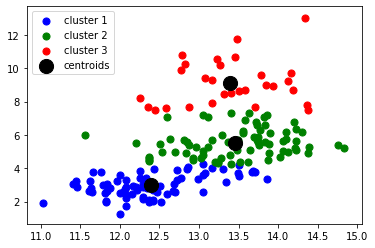

In [18]:
colors=["red","green","blue"]
df['subset']=np.select([df.cluster==1, df.cluster==2, df.cluster==3],['cluster 1', 'cluster 2', 'cluster 3'])
for color, label in zip('bgrm', ['cluster 1', 'cluster 2', 'cluster 3']):
    subset=df[df.subset==label]
    plt.scatter(subset.alcohol, subset.color_intensity, s=50, c=color, label=str(label))
plt.scatter(centroids['alcohol'], centroids['color_intensity'], c="black", s=200, label="centroids")
plt.legend()

#### Considering 3 variables

In [19]:
X=data[['alcohol', 'color_intensity','ash']]
X.head()

,alcohol,color_intensity,ash
0,14.23,5.64,2.43
1,13.20,4.38,2.14
2,13.16,5.68,2.67
3,14.37,7.80,2.50
4,13.24,4.32,2.87


In [20]:
df=kmeans(X)
df.head()

,alcohol,color_intensity,ash,cluster
0,12.34,2.80,2.46,3
1,13.73,6.62,2.26,1
2,11.82,1.95,1.99,3
3,13.39,4.80,2.62,1
4,12.72,3.30,2.28,3


In [21]:
df_sum=df.groupby(["cluster"]).sum()
df_sum

,alcohol,color_intensity,ash
cluster,,,
1,941.91,372.740000,169.48
2,481.85,314.859999,87.78
3,890.35,212.740000,163.98


In [22]:
df_count=df.groupby(["cluster"]).count()
df_count

,alcohol,color_intensity,ash
cluster,,,
1,70,70,70
2,36,36,36
3,72,72,72


In [23]:
centroids=df_sum.iloc[0:3]/df_count.iloc[0:3]
centroids

,alcohol,color_intensity,ash
cluster,,,
1,13.455857,5.324857,2.421143
2,13.384722,8.746111,2.438333
3,12.365972,2.954722,2.277500


/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


<Figure size 432x288 with 0 Axes>

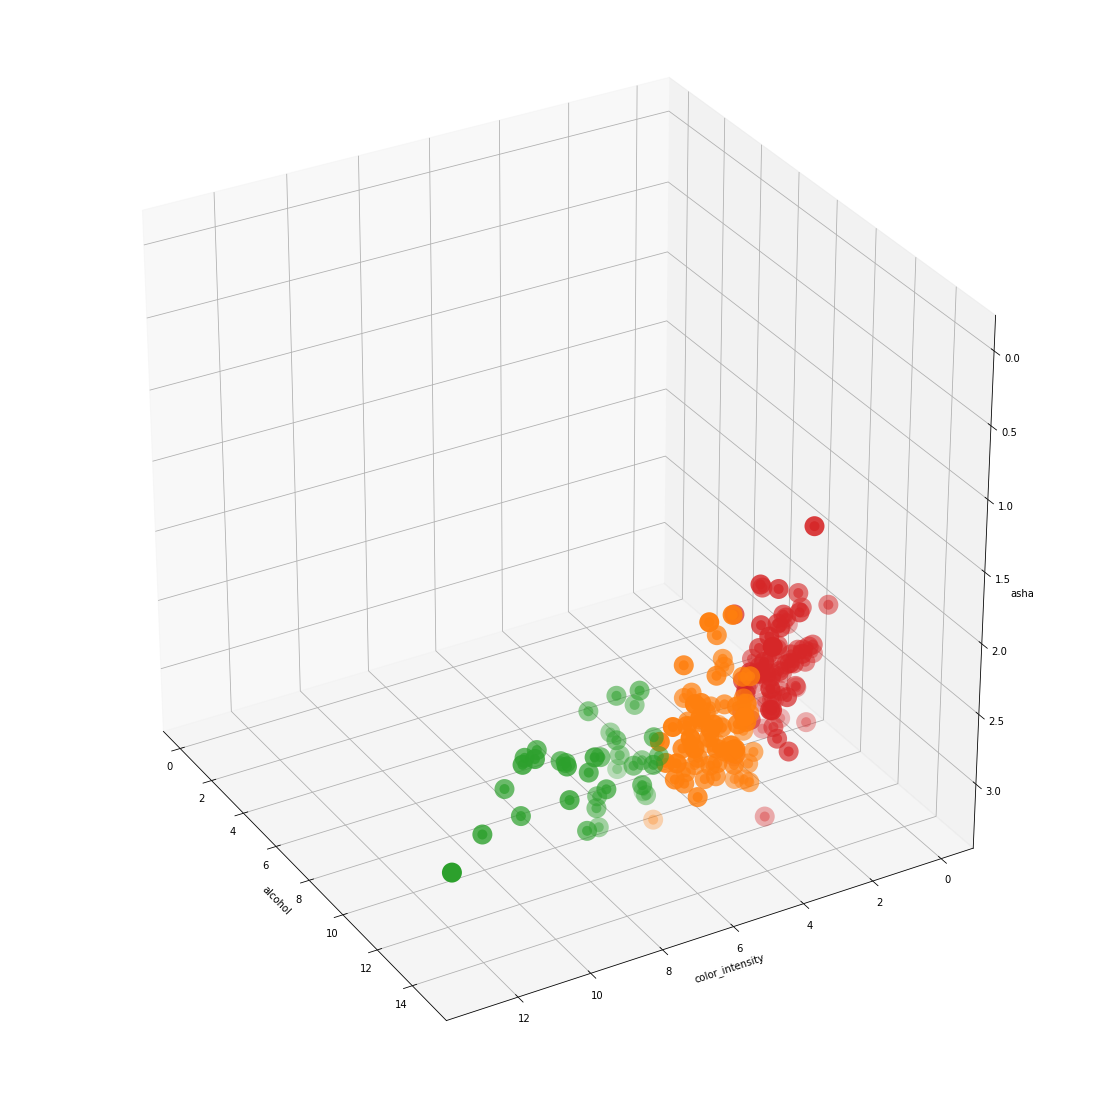

In [24]:
from mpl_toolkits.mplot3d import Axes3D
plt.clf()
fig = plt.figure(figsize=(15,15))
ax = Axes3D(fig, elev=-150, azim=210)
for k in range(0,4):
    ax.scatter3D(df[df.cluster == k]['alcohol'],
                df[df.cluster == k]['color_intensity'],
                df[df.cluster == k]['ash'], s=100, linewidth=10)
ax.set_xlabel("alcohol")
ax.set_ylabel("color_intensity")
ax.set_zlabel("asha")
fig.show()
fig.savefig("3d.png", dpi=200)